### Import data and libraries

In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

### DATA PREPARATION 

In [2]:
df = pd.read_csv('Dulieumatong_T.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,32758,32759,32760,32761,32762,32763,32764,32765,32766,32767
0,Cà phê - Keo,276680,282074,262814,274124,257009,246744,258313,249312,244081,...,-61679,-64809,-44008,-59535,-48110,-50369,-37185,-49298,-33806,-33171
1,Lẩu Mật ong,375042,378932,392569,384884,341420,375224,358159,377123,364922,...,165789,156325,182297,202128,189209,159940,197481,166932,209883,210335
2,M1,274081,265869,264909,256522,249147,271565,255143,256080,249425,...,-46664,-41674,-51701,-39064,-47499,-38501,-48589,-26356,-15331,-31098
3,M2,144523,140970,148110,160950,162910,146215,143320,138214,142995,...,113810,102625,97814,125825,105482,99835,92555,109195,120314,116358
4,M3,158108,183212,195281,177675,184293,198710,183120,175189,173775,...,73479,77319,86290,80860,93340,80050,79605,76033,94079,86529


In [3]:
y = df.iloc[:, 0]
pd.DataFrame(y)

,Unnamed: 0
0,Cà phê - Keo
1,Lẩu Mật ong
2,M1
3,M2
4,M3
...,...
57,MR5
58,MR6
59,MR11
60,T2.1


In [4]:
from sklearn import preprocessing

# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
label= label_encoder.fit_transform(y)
  
label

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 34, 35, 36, 37, 38, 39, 30,
       31, 32, 33, 40,  5,  6,  7,  8,  0,  1,  2,  3,  4, 61, 58,  9, 12,
       13, 14, 15, 16, 17, 18, 19, 10, 11, 42, 41, 43, 44, 45, 46, 57, 47,
       48, 49, 50, 52, 53, 54, 55, 56, 51, 59, 60])

In [5]:
data = df.iloc[:, 1:]

In [6]:
# scaled_data = data / 100000000000
# print(np.min(scaled_data))
# print(np.max(scaled_data))

In [7]:
from sklearn import preprocessing
# Get column names first
names = data.columns
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(data)

In [8]:
# # Run standardization on X variables
# from sklearn.preprocessing import scale 
# scaled_data = data / 100000000000
# scaled_data = scale(data)

___
### Principal Components Regression

#### Evaluate for different number of principal components

In [9]:
rmse_list = []
R2_list = []

In [10]:
# First generate all the principal components
pca = PCA()
data2 = pca.fit_transform(scaled_data)
data2 = pd.DataFrame(data2)
data2.to_excel("PCA40_data.xlsx")

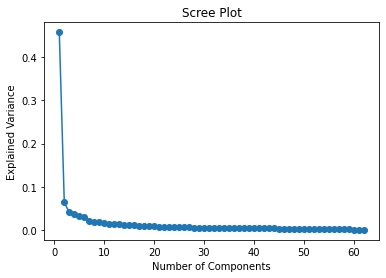

In [11]:
explained_variance = pca.explained_variance_ratio_
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

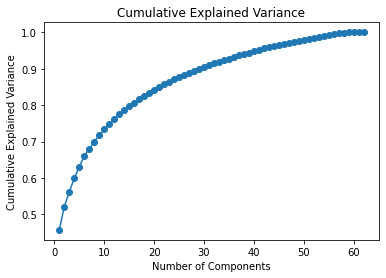

In [12]:
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

KeyError: (slice(None, None, None), 0)

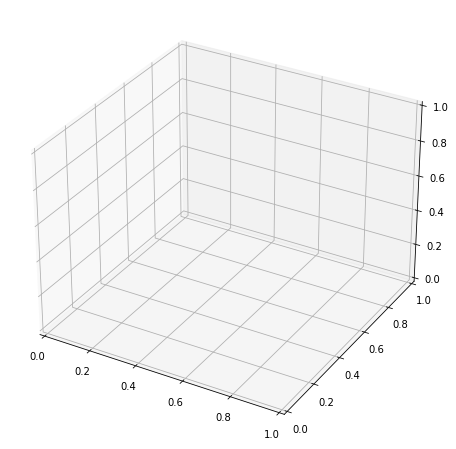

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2[:, 0], data2[:, 1], data2[:, 2], c=label, cmap='viridis', edgecolors='k')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Scatter plot of the first three Principal Components')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
data3 = pca.fit_transform(scaled_data)
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(data3)
 
# pd.DataFrame(label).to_excel("labels.xlsx")

In [ ]:
df.iloc[:, 0] = label

In [ ]:
df.to_csv("Matong_data.csv")

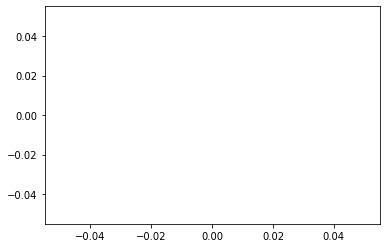

In [ ]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = data3[label ==4]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

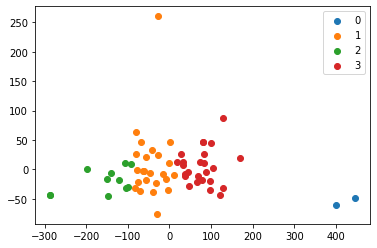

In [ ]:
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(data3[label == i , 0] , data3[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    # rmse_score = -1 * cross_val_score(lin_reg, 
    #                                   X_train_pc[:,:i], # Use first k principal components
    #                                   y_train, 
    #                                   cv=cv, 
    #                                   scoring='neg_mean_squared_error').mean()
    # rmse_list.append(rmse_score)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_pc[:, :i], y_train)
    y_pred = lin_reg.predict(X_train_pc[:, :i])
    rmse_list.append(np.sqrt(np.sum(np.square(y_pred - y_train), axis=0) / y_train.shape[0]))
    R2_list.append(r2_score(y_train, y_pred))

NameError: name 'X_train_pc' is not defined

In [ ]:
rmse_list=np.array(rmse_list)
R2_list = np.array(R2_list).reshape(-1,1)
rmse_list.shape

(0,)

In [ ]:
R2_list[6:,:].shape

(0, 1)

ValueError: x and y must have same first dimension, but have shapes (25,) and (0, 1)

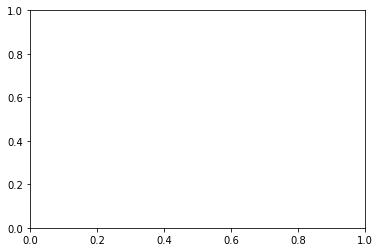

In [ ]:
plt.plot(np.arange(6,31),R2_list[6:,:], "-o", color = "black")
plt.xticks(np.arange(6,32, 5))
plt.xlabel("Number of PC")
plt.ylabel("R square value")
plt.show()

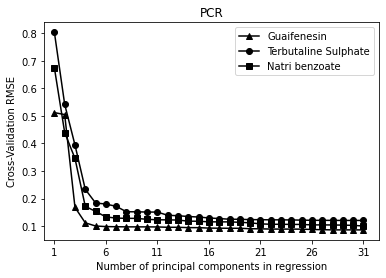

In [ ]:
# Plot RMSE vs count of principal components used
plt.plot(rmse_list[:,0], '-^', label='Guaifenesin', color='black')
plt.plot(rmse_list[:,1], '-o', label='Terbutaline Sulphate', color='black')
plt.plot(rmse_list[:,2], '-s', label='Natri benzoate', color='black')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('PCR')
plt.xlim(xmin=-1)
plt.xticks(np.arange(X_train_pc.shape[1], step=5), np.arange(1, X_train_pc.shape[1]+1, step=5))
plt.legend()
plt.show()

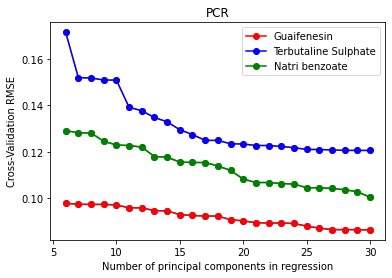

In [ ]:
# Plot RMSE vs count of principal components used
plt.plot(np.arange(6, 31),rmse_list[6:,:], '-o')
plt.plot(np.arange(6, 31),rmse_list[6:,0], '-o', label='Guaifenesin', color='red')
plt.plot(np.arange(6, 31),rmse_list[6:,1], '-o', label='Terbutaline Sulphate', color='blue')
plt.plot(np.arange(6, 31),rmse_list[6:,2], '-o', label='Natri benzoate', color='Green')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('PCR')
# plt.xticks(np.arange(6, 31, step=5))
plt.legend()
# plt.xticks(np.arange(X_train_pc.shape[1] - 6), np.arange(1, X_train_pc.shape[1] - 6))
plt.show()

In [ ]:
rmse_list = rmse_list.mean(axis=1)

In [ ]:
(value,min_index) = min((v,i) for i,v in enumerate(list(rmse_list)))
value, min_index

(0.10233513544248352, 30)

In [ ]:
# Visually determine optimal number of principal components
best_pc_num = min_index + 1

#### Predict

In [ ]:
# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

In [ ]:
# R2 score
lin_reg_pc.score(X_train_pc[:,:best_pc_num], y_train)

0.9858404098088469

In [ ]:
# Get principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]
X_test_pc.shape

(34, 31)

In [ ]:
# Predict on test data
PCR_preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = np.sqrt(np.sum(np.square(PCR_preds - y_test), axis=0) / y_train.shape[0])
pcr_score_test.mean()

0.14972984141834858

In [ ]:
r2_score(y_test, PCR_preds)

0.8689620122984388

In [ ]:
# preds = lin_reg_pc.predict(X_train_pc)
# pcr_score_train = np.sqrt(np.sum(np.square(preds - y_test), axis=0) / y_train.shape[0])
# pcr_score_train.mean()

In [ ]:
# mauthuoc = pd.read_excel("mauthuoc.xlsx")
# mauthuoc = scale(mauthuoc.iloc[:,1:].values)
# mauthuoc = pca.fit_transform(mauthuoc)
# # lin_reg_pc.predict(mauthuoc)
# mauthuoc.shape

## ANN IMPLEMENT

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T
X_val = X_val.T
y_val = y_val.T


In [ ]:
# model = ANN_pkg_2.Neural_Network([X_train.shape[0],8, 8,y_train.shape[0]], ANN_pkg_2.ReLU, weights, bias)
model = ANN_pkg_2.Neural_Network([X_train.shape[0],8, 8,y_train.shape[0]], ANN_pkg_2.ReLU)

In [ ]:
epochs = 230000

In [ ]:
model.fit(X_train, y_train, X_val, y_val, learning_rate = 0.04, alpha = 0, epochs = epochs, lr_down=True, lr_decay=100)


Loading 10.0%
Loading 20.0%
Loading 30.0%
Loading 40.0%
Loading 50.0%
Loading 60.0%
Loading 70.0%
Loading 80.0%
Loading 90.0%
Loading 100.0%
Learning process completed!!!


In [ ]:
pd.DataFrame()

""


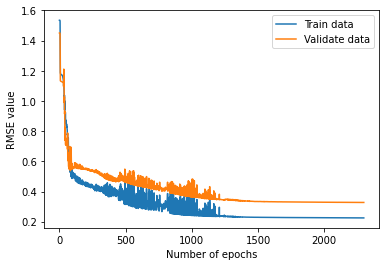

In [ ]:
plt.plot(np.sqrt(model.cost_his), label = "Train data")
plt.plot(np.sqrt(model.test_cost_his), label = "Validate data")
# plt.xticks(np.arange(epo))
plt.xlabel("Number of epochs")  
plt.ylabel("RMSE value")
plt.legend(loc="upper right")

In [ ]:
print(np.sqrt(model.cost_his[-1]))
print(np.sqrt(model.test_cost_his[-1]))

0.22492798547048679
0.3274851838530633


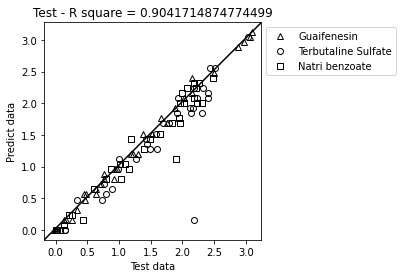

In [ ]:
ANN_pred = model.forward(X_test)
plt.plot(ANN_pred[0,:].T, y_test[0,:].T, "^", label = "Guaifenesin", color = "black", fillstyle='none')
plt.plot(ANN_pred[1,:].T, y_test[1,:].T, "o", label = "Terbutaline Sulfate", color = "black", fillstyle='none')
plt.plot(ANN_pred[2,:].T, y_test[2,:].T, "s", label = "Natri benzoate", color = "black", fillstyle='none')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Test data")
plt.ylabel("Predict data")
plt.xticks(np.arange(3.5, step=0.5))
plt.yticks(np.arange(3.5, step=0.5))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = "black")
plt.title(f"Test - R square = {r2_score(y_test.T, ANN_pred.T)}")
plt.show()

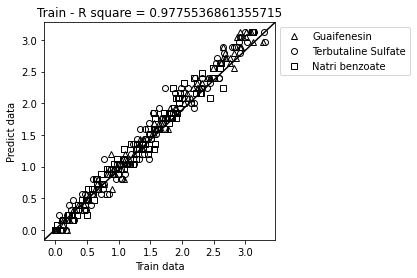

In [ ]:
y_pred = model.forward(X_train)
# y_train.shape
plt.plot(y_pred[0,:].T, y_train[0,:].T, "^", label = "Guaifenesin", color = "black", fillstyle='none')
plt.plot(y_pred[1,:].T, y_train[1,:].T, "o", label = "Terbutaline Sulfate", color = "black", fillstyle='none')
plt.plot(y_pred[2,:].T, y_train[2,:].T, "s", label = "Natri benzoate", color = "black", fillstyle='none')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Train data")
plt.ylabel("Predict data")
plt.xticks(np.arange(3.5, step=0.5))
plt.yticks(np.arange(3.5, step=0.5))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = "black")
plt.title(f"Train - R square = {r2_score(y_train.T, y_pred.T)}")
plt.show()

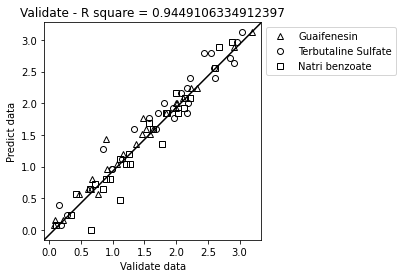

In [ ]:
y_pred = model.forward(X_val)
# y_val.shape
plt.plot(y_pred[0,:].T, y_val[0,:].T, "^", label = "Guaifenesin", color = "black", fillstyle='none')
plt.plot(y_pred[1,:].T, y_val[1,:].T, "o", label = "Terbutaline Sulfate", color = "black", fillstyle='none')
plt.plot(y_pred[2,:].T, y_val[2,:].T, "s", label = "Natri benzoate", color = "black", fillstyle='none')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Validate data")
plt.ylabel("Predict data")
plt.xticks(np.arange(3.5, step=0.5))
plt.yticks(np.arange(3.5, step=0.5))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = "black")
plt.title(f"Validate - R square = {r2_score(y_val.T, y_pred.T)}")
plt.show()

In [ ]:
mauthuoc = pd.read_excel("mauthuoc.xlsx")
mauthuoc = mauthuoc.iloc[:,1:].values / 10
mauthuoc = mauthuoc.T

In [ ]:
model.forward(mauthuoc).T[:20, :] * 10
# GF: 33.25
# TBS: 0.75
# NaB: 5

array([[4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709]])

In [ ]:
df = np.concatenate([y_test.T[:20,:]*10, PCR_preds[:20,:]*10, ANN_pred.T[:20,:] * 10],axis=1)
# pd.DataFrame(df).to_excel("Mauthuc2.xlsx")
pd.DataFrame(df)

,0,1,2,3,4,5,6,7,8
0,8.0,25.6,20.0,10.989070,24.683757,21.801563,7.696417,25.135077,23.082590
1,5.6,18.4,20.8,8.119092,20.323229,20.171227,4.479608,21.279144,21.792595
2,29.6,1.6,11.2,32.766270,22.465135,18.748346,29.668340,21.865938,19.034990
3,20.8,12.8,14.4,23.695162,12.340803,14.355736,20.224122,15.947589,14.940774
4,0.0,0.0,0.0,3.159916,1.516749,-1.985880,0.166111,0.176588,0.183454
5,4.8,16.8,2.4,6.752762,21.221964,3.607982,4.633845,17.876479,2.130939
6,21.6,30.4,0.0,24.658491,30.321944,-0.447245,21.462574,30.311239,0.150031
7,24.8,25.6,20.0,27.412219,27.527115,22.322619,25.030033,24.338422,22.277313
8,0.0,0.0,0.0,2.144657,2.084344,0.348605,0.089131,0.222471,0.106090
9,30.4,6.4,10.4,33.015390,7.981194,13.928546,30.649956,8.871984,10.203887


In [ ]:
# weights = pickle.load( open( 'weights.pkl' , 'rb' ))
# bias = pickle.load( open( 'bias.pkl' , 'rb' ))

In [ ]:
# model2 = ANN_pkg_2.Neural_Network([X_train.shape[0],8, 8,y_train.shape[0]], ANN_pkg_2.ReLU, weights, bias)

In [ ]:
# model2.forward(X_test).T * 10